#**Convulutional Neural Network**

1. Pooling is used to reduced size of input image
2. **max pooling** helps position variation
3. **Avearge pooling**

Data Augumentation
1. genearte new rotated image by  givwe data sets


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train,y_train), (x_test,y_test) = keras.datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
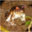

In [ ]:
x_train[0]

AxesImage(size=(32, 32))


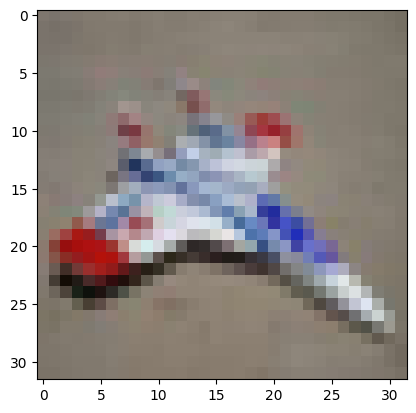

In [ ]:
print(plt.imshow(x_train[30]))

In [ ]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


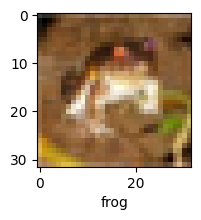

In [ ]:
plot_sample(x_train,y_train,0)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
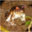

In [ ]:
x_train[0]

In [ ]:
x_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

**Model Building And Training**

```
# This is formatted as code
```



In [ ]:
ann = keras.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)


In [ ]:
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 13s 7ms/step - loss: 1.8102 - accuracy: 0.3554
Epoch 2/5
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6196 - accuracy: 0.4276
Epoch 3/5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5367 - accuracy: 0.4568
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4776 - accuracy: 0.4790
Epoch 5/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4292 - accuracy: 0.4960


In [ ]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.5424 - accuracy: 0.4426


[1.5423938035964966, 0.4426000118255615]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(ele) for ele in y_pred]
print("Classification Report: \n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.40      0.47      1000
           1       0.63      0.51      0.56      1000
           2       0.39      0.21      0.27      1000
           3       0.40      0.21      0.28      1000
           4       0.33      0.60      0.43      1000
           5       0.42      0.34      0.37      1000
           6       0.47      0.62      0.53      1000
           7       0.74      0.30      0.42      1000
           8       0.35      0.87      0.50      1000
           9       0.58      0.37      0.45      1000

    accuracy                           0.44     10000
   macro avg       0.49      0.44      0.43     10000
weighted avg       0.49      0.44      0.43     10000



**Now Using CNN instead of ANN**

In [ ]:
cnn = keras.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    #dense

    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [ ]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 4ms/step - loss: 1.4910 - accuracy: 0.4628
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1647 - accuracy: 0.5901
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0358 - accuracy: 0.6394
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9600 - accuracy: 0.6641
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9076 - accuracy: 0.6815
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8565 - accuracy: 0.6999
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8175 - accuracy: 0.7127
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7829 - accuracy: 0.7259
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7525 - accuracy: 0.7348
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9693 - accuracy: 0.6754


[0.9693065285682678, 0.6754000186920166]

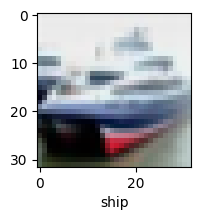

In [ ]:
y_test = y_test.reshape(-1,)
plot_sample(x_test,y_test,1)

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.59994252e-02, 8.03143630e-05, 2.32888851e-03, 9.08767045e-01,
        1.48667966e-03, 1.40392566e-02, 4.21326756e-02, 8.29523662e-04,
        1.40866600e-02, 2.49539298e-04],
       [7.59427156e-03, 7.54453480e-01, 6.54270434e-06, 6.63816365e-07,
        7.10658753e-07, 2.37258142e-08, 6.90650594e-08, 2.10616324e-09,
        2.36899048e-01, 1.04519818e-03],
       [3.85038443e-02, 1.36179209e-01, 4.58174245e-03, 5.42696938e-03,
        1.66144373e-03, 1.10219198e-03, 3.85450316e-04, 1.08952657e-03,
        7.97096908e-01, 1.39726652e-02],
       [8.18766713e-01, 1.23282587e-02, 2.11243071e-02, 2.02054245e-04,
        2.21865042e-03, 6.76055720e-07, 1.35423878e-04, 3.26721565e-05,
        1.45178452e-01, 1.27686508e-05],
       [1.48295667e-05, 3.12950579e-04, 2.60648131e-02, 1.64350629e-01,
        3.92651647e-01, 1.41698010e-02, 4.02064055e-01, 1.15643736e-04,
        2.28555306e-04, 2.69785542e-05]], dtype=float32)

In [ ]:
y_classes = [np.argmax(ele) for ele in y_pred]
y_classes[:5]

[3, 1, 8, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
classes[y_classes[5]]

'frog'

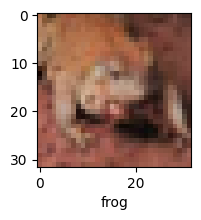

In [ ]:
plot_sample(x_test,y_test,5)

In [ ]:
# Convolution padding and stride

#**Flower Classification**

In [43]:
# Data Augumentation helps to overcome when cnn don't classifify same flip image

In [44]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import os
import PIL
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [45]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file("flower_photos.tgz",origin=dataset_url,cache_dir='.',untar=True,extract=True)
base_dir = os.path.join(os.path.dirname(data_dir), 'flower_photos')

In [46]:
base_dir


'./datasets/flower_photos'

In [47]:
import pathlib
data_dir  = pathlib.Path(base_dir)
data_dir

PosixPath('datasets/flower_photos')

In [48]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [49]:
roses = list(data_dir.glob('roses/*'))
len(roses)

641

In [50]:
tulips = list(data_dir.glob('tulips/*'))

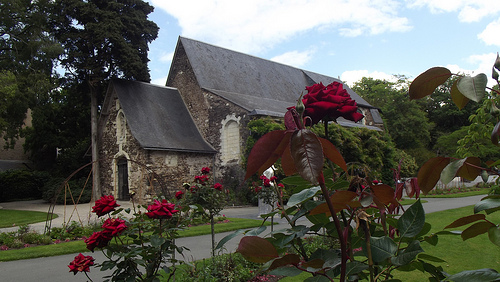

In [51]:
PIL.Image.open(str(roses[0]))

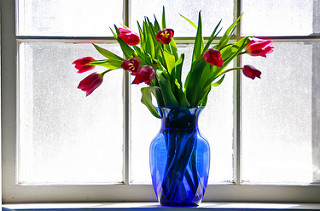

In [52]:
PIL.Image.open(str(tulips[2]))

In [53]:
flowers_image_dict = {
    'roses':list(data_dir.glob('roses/*')),
    'daisys':list(data_dir.glob('daisy/*')),
    'dandelions':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*'))
}

In [54]:
flowers_labels_dict={
    'roses':0,
    'daisys':1,
    'dandelions':2,
    'sunflowers':3,
    'tulips':4
}

In [55]:
img  = cv2.imread(str(flowers_image_dict['roses'][0]))
img.shape

(282, 500, 3)

In [56]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [57]:
x, y = [], []

for flower_name, images in flowers_image_dict.items():
  # print(flower_name)
  # print(len(images))
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(180,180))
    x.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

array([[[ 35,  49,  44],
        [ 35,  51,  47],
        [ 27,  45,  41],
        ...,
        [254, 253, 253],
        [255, 253, 252],
        [253, 253, 253]],

       [[ 47,  59,  56],
        [ 26,  39,  34],
        [ 33,  42,  40],
        ...,
        [254, 254, 253],
        [254, 253, 253],
        [254, 254, 254]],

       [[117, 103,  98],
        [ 40,  53,  43],
        [ 33,  40,  36],
        ...,
        [253, 253, 253],
        [254, 254, 254],
        [253, 253, 253]],

       ...,

       [[107, 112, 111],
        [107, 112, 111],
        [105, 110, 109],
        ...,
        [ 31,  53,  42],
        [ 27,  49,  36],
        [ 62,  86,  71]],

       [[108, 113, 112],
        [104, 109, 108],
        [104, 109, 108],
        ...,
        [ 34,  59,  45],
        [ 67,  83,  69],
        [ 69,  67,  63]],

       [[106, 111, 110],
        [104, 109, 108],
        [103, 108, 107],
        ...,
        [ 22,  40,  31],
        [ 16,  27,  24],
        [ 13,  26,  20]]], dtype=uint8)
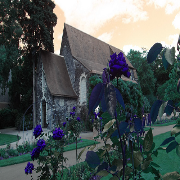

In [58]:
x[0]

In [59]:
import numpy as np
x = np.array(x)
y = np.array(y)


In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)


In [61]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255


In [63]:
num_classes=5
model = Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

In [64]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [65]:
model.fit(x_train_scaled,y_train,epochs=40)

Epoch 1/40
86/86 [==============================] - 4s 26ms/step - loss: 1.4856 - accuracy: 0.4150
Epoch 2/40
86/86 [==============================] - 2s 26ms/step - loss: 0.9939 - accuracy: 0.6105
Epoch 3/40
86/86 [==============================] - 2s 27ms/step - loss: 0.8177 - accuracy: 0.6991
Epoch 4/40
86/86 [==============================] - 2s 25ms/step - loss: 0.5614 - accuracy: 0.8031
Epoch 5/40
86/86 [==============================] - 2s 25ms/step - loss: 0.2846 - accuracy: 0.9059
Epoch 6/40
86/86 [==============================] - 2s 25ms/step - loss: 0.1530 - accuracy: 0.9517
Epoch 7/40
86/86 [==============================] - 3s 29ms/step - loss: 0.0604 - accuracy: 0.9840
Epoch 8/40
86/86 [==============================] - 2s 28ms/step - loss: 0.0221 - accuracy: 0.9949
Epoch 9/40
86/86 [==============================] - 2s 26ms/step - loss: 0.0081 - accuracy: 0.9993
Epoch 10/40
86/86 [==============================] - 2s 25ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 11/

In [66]:
model.evaluate(x_test_scaled,y_test)


29/29 [==============================] - 0s 11ms/step - loss: 3.6159 - accuracy: 0.5839


[3.6159262657165527, 0.5838779807090759]

In [71]:
y_predicted = model.predict(x_test_scaled)
y_predicted

29/29 [==============================] - 0s 13ms/step


array([[ -1.5903922 ,  -4.5635524 ,   1.9543709 ,  -9.93818   ,
          2.0012083 ],
       [ -0.9087257 ,  -0.27309373, -13.154025  , -10.884933  ,
         19.726995  ],
       [-11.461876  , -14.832827  ,  10.794145  ,  -4.117429  ,
         -0.17763303],
       ...,
       [ -3.798073  , -17.917065  ,  -1.3139998 ,  18.902084  ,
          2.0997114 ],
       [  4.8377757 ,   1.459795  ,   4.2773175 , -19.314032  ,
        -16.270792  ],
       [  1.9817569 , -20.00174   , -15.294482  ,  25.084631  ,
          3.815722  ]], dtype=float32)

In [67]:
score = tf.nn.softmax(y_predicted[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([4.2717982e-10, 2.4319013e-05, 9.9997544e-01, 1.4830626e-07,
       7.2455727e-08], dtype=float32)>

In [68]:
np.argmax(score)

2

In [69]:
y_test[0]

1

In [70]:
data_augumentation = Sequential([
    # layers.experimental.preprocessing.RandomZoom(0.5)
    layers.experimental.preprocessing.RandomContrast(0.9)
])

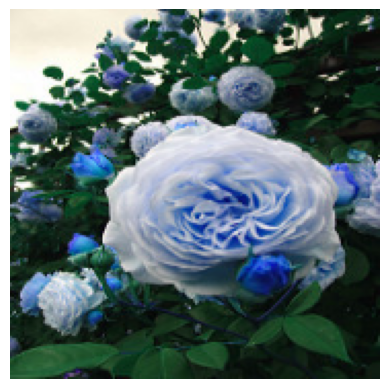

In [72]:
plt.axis('off')
plt.imshow(x[1])

In [73]:
data_augumentation(x)[1]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[255.       , 255.       , 255.       ],
        [255.       , 255.       , 255.       ],
        [255.       , 255.       , 255.       ],
        ...,
        [  0.       ,  20.563797 ,   0.9187309],
        [  0.       ,   0.       ,   0.       ],
        [  0.       ,  13.200667 ,   0.       ]],

       [[255.       , 255.       , 255.       ],
        [255.       , 255.       , 255.       ],
        [255.       , 255.       , 255.       ],
        ...,
        [  0.       ,  14.673293 ,   0.       ],
        [  0.       ,   5.8375373,   0.       ],
        [  0.       ,  14.673293 ,   0.       ]],

       [[255.       , 255.       , 255.       ],
        [255.       , 255.       , 255.       ],
        [255.       , 255.       , 255.       ],
        ...,
        [  0.       ,  19.091171 ,   0.       ],
        [  0.       ,  14.673293 ,   0.       ],
        [  0.       ,   0.       ,   0.       ]],

       ...,

     

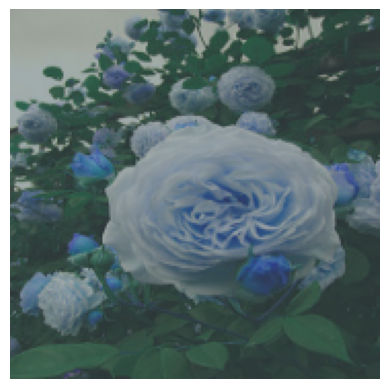

In [74]:
plt.axis('off')
plt.imshow(data_augumentation(x)[1].numpy().astype('uint8'))

In [76]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

In [77]:
num_classes=5
model1 = Sequential([
    data_augumentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])


In [79]:
model1.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model1.fit(x_train_scaled,y_train,epochs=40)


Epoch 1/40
86/86 [==============================] - 6s 28ms/step - loss: 1.3552 - accuracy: 0.4052
Epoch 2/40
86/86 [==============================] - 2s 28ms/step - loss: 1.1380 - accuracy: 0.5145
Epoch 3/40
86/86 [==============================] - 2s 28ms/step - loss: 1.0559 - accuracy: 0.5705
Epoch 4/40
86/86 [==============================] - 3s 30ms/step - loss: 0.9509 - accuracy: 0.6145
Epoch 5/40
86/86 [==============================] - 3s 34ms/step - loss: 0.8230 - accuracy: 0.6886
Epoch 6/40
86/86 [==============================] - 2s 28ms/step - loss: 0.6938 - accuracy: 0.7307
Epoch 7/40
86/86 [==============================] - 2s 28ms/step - loss: 0.5246 - accuracy: 0.8067
Epoch 8/40
86/86 [==============================] - 2s 28ms/step - loss: 0.4443 - accuracy: 0.8408
Epoch 9/40
86/86 [==============================] - 3s 31ms/step - loss: 0.3887 - accuracy: 0.8601
Epoch 10/40
86/86 [==============================] - 3s 30ms/step - loss: 0.2610 - accuracy: 0.9081
Epoch 11/

In [80]:
model1.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 1s 12ms/step - loss: 5.0353 - accuracy: 0.6035


[5.035329341888428, 0.6034858226776123]

In [82]:
y_predicted = model1.predict(x_test_scaled)
y_predicted

29/29 [==============================] - 0s 10ms/step


array([[-1.0789611e+01,  2.4630921e-01,  5.3648443e+00,  3.5593278e+00,
         3.3188858e+00],
       [ 1.2907313e+00,  5.6250248e+00, -6.4222765e+00, -1.2386525e+01,
         1.3720480e+01],
       [-8.4954472e+00, -2.1721140e+01,  1.5214832e+01,  4.3994265e+00,
        -3.8944921e+00],
       ...,
       [-1.0426571e+01, -1.2338319e+01,  5.1116266e+00,  1.1582615e+01,
         2.4412675e+00],
       [ 1.2640366e+01,  5.8119493e+00, -1.7014441e+00, -2.5544872e+01,
         2.9372983e-02],
       [ 5.6317991e-01, -1.5724454e+01, -1.0469268e+01,  2.9711287e+01,
        -8.6120996e+00]], dtype=float32)

In [83]:
score = tf.nn.softmax(y_predicted[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([7.4197509e-08, 4.6049883e-03, 7.6944941e-01, 1.2648942e-01,
       9.9456131e-02], dtype=float32)>

In [86]:
np.argmax(score[1])

0

In [87]:
y_test[1]

0